<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Dynamic systems: 9. Shallow-water equations
## 2D solution
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Shallow-water equations in 2D

$$
\begin{array}{rcl}
\frac{\partial h}{\partial t}
+ \frac{\partial (hu)}{\partial x}
+ \frac{\partial (hv)}{\partial y} = 0 \\
\frac{\partial (hu)}{\partial t}
+ \frac{\partial (hu^2 + \frac{1}{2}gh^2)}{\partial x}
+ \frac{\partial (huv)}{\partial y} = 0 \\
\frac{\partial (hv)}{\partial t}
+ \frac{\partial (huv)}{\partial x}
+ \frac{\partial (hv^2 + \frac{1}{2}gh^2)}{\partial y} = 0
\end{array}
$$
with:

- $h$ [m] - water height,
- $u,v$ [m/s] - velocity in $x$- and $y$-direction,
- $g$ [m/s$^2$] - grav. acceleration,
- $t$ [s] - time,
- $x,y$ [m] - $x$- and $y$-coordinates.

We develop solutions for the **shallow-water equations** for two dimensions, using the
`local Lax-Friedrich and Rusanov flux` scheme (LLF-RF):
$$
\begin{array}{rcl}
F_{hu} &=& h u \\
F_{hv} &=& h v \\
F_{hu^2} &=& hu^2 + \frac{1}{2}gh^2 \\
F_{hv^2} &=& hv^2 + \frac{1}{2}gh^2 \\
F_{huv} &=& huv 
\end{array}
$$

In [2]:
nx   = 101
ny   = 101
xmin = 0.; xmax = 10.0
ymin = 0.; ymax = 10.0
T    = 5.0
CFL  = 0.99
g    = 9.81
mu   = 2
sigma = 1

x = np.linspace(xmin,xmax,nx)
y = np.linspace(ymin,ymax,ny)
X,Y = np.meshgrid(x,y,indexing='ij')
dx = (x.max()-x.min()) / (nx-1)
dy = (y.max()-y.min()) / (ny-1)
dt = 0.005
print("dx: ",dx," dy: ",dy," dt: ",dt)

dx:  0.1  dy:  0.1  dt:  0.005


In [3]:
h  = 0*X
hu = 0*X
hv = 0*X
#h  = np.zeros(nx*ny).reshape(ny,nx)
#hu = np.zeros(nx*ny).reshape(ny,nx)
#hv = np.zeros(nx*ny).reshape(ny,nx)
print(h.shape)
print(hu.shape)
print(hv.shape)


(101, 101)
(101, 101)
(101, 101)


In [4]:
def bcNeumann(var):
    ### NEUMANN BC ###
    var[0,:]  = var[1,:]
    var[-1,:] = var[-2,:]
    var[:,0]  = var[:,1]
    var[:,-1] = var[:,-2]
    return var

def bcPeriodic(var):
    ### PERIODIC BC ###
    var[0,:]  = var[-2,:]
    var[-1,:] = var[1,:]
    var[:,0]  = var[:,-2]
    var[:,-1] = var[:,1]
    return var

def dtCourant(dx,maxeigen,time,TMAX,CFL):
    dt  = CFL*dx/maxeigen
    if time+dt>TMAX:
        dt = TMAX-time
    return dt

def addGhostCells(var,gleft,gright,gbottom,gtop):
    var = np.vstack([gtop*np.ones(nx).reshape(1,nx),var,gbottom*np.ones(nx).reshape(1,nx)])
    var = np.hstack([gleft*np.ones(ny+2).reshape(ny+2,1),var,gright*np.ones(ny+2).reshape(ny+2,1)])
    return var

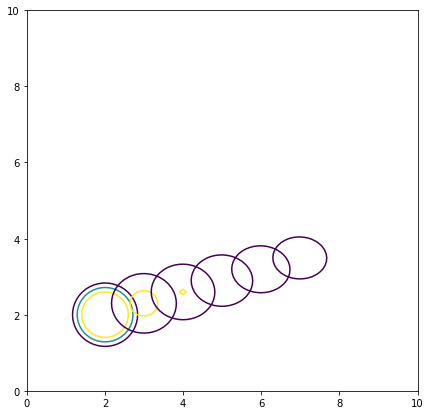

In [5]:
uu = 1.0
vv = 0.3
# Finite volume with Rusanov flux scheme
# start time
time   = 0
dtplot = 1.00
tplot  = dtplot
# initial values
h = np.exp(-((X-mu)**2+(Y-mu)**2)/sigma**2)
plt.figure(figsize=(7,7))
plt.contour(X,Y,h,levels=[0.5,0.6,0.7])
# solution
while (time < T):
    time = time + dt
    # set boundary conditions
    h  = bcPeriodic(h)
    
    h = np.maximum(0.1,h)
    
    Fhup = h[1:,:]*uu
    Fhum = h[:-1,:]*uu
    Fhvp = h[:,1:]*vv
    Fhvm = h[:,:-1]*vv
    
    #print(Fhup.shape,Fhum.shape)
    #print(Fhvp.shape,Fhvm.shape)
    Rhx  = (Fhup+Fhum)/2 - uu/2*(h[1:,:]-h[:-1,:])
    Rhy  = (Fhvp+Fhvm)/2 - vv/2*(h[:,1:]-h[:,:-1])
    
    #print(Rhx.shape,Rhy.shape)
    h[1:-1,1:-1] = h[1:-1,1:-1] - dt/dx*(Rhx[1:,1:-1]-Rhx[:-1,1:-1]) \
                                - dt/dy*(Rhy[1:-1,1:]-Rhy[1:-1,:-1])
    if (time > tplot):
        plt.contour(X,Y,h,levels=[0.5,0.8])
        tplot = tplot + dtplot

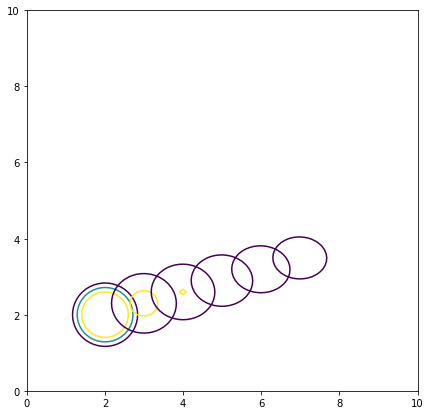

In [6]:
uu = 1.0
vv = 0.3
# Finite volume with Rusanov flux scheme
# start time
time   = 0
dtplot = 1.0
tplot  = dtplot
# initial values
h  = np.exp(-((X-mu)**2+(Y-mu)**2)/sigma**2)
hu = 0*h
hv = 0*h

plt.figure(figsize=(7,7))
plt.contour(X,Y,h,levels=[0.5,0.6,0.7])
# solution
while (time < T):
    time = time + dt
    # set boundary conditions
    h  = bcPeriodic(h)
    hu = bcPeriodic(hu)
    hv = bcPeriodic(hv)
    
    h = np.maximum(0.1,h)
    u = uu*h/h #hu/h
    v = vv*h/h #hv/h
    c = np.sqrt(g*h)
    #print(u.shape,v.shape,c.shape)
    #print(u.min(),u.max())
    #print(v.min(),v.max())
    #print(c.min(),c.max())
    maxeigenu = np.max(np.maximum(np.abs(u-c),np.abs(u+c)))
    maxeigenv = np.max(np.maximum(np.abs(v-c),np.abs(v+c)))
    maxeigen = max(maxeigenu,maxeigenv)
    # calculate time step according to CFL-condition
    #dt = dtCourant(dx,maxeigen,time,T,CFL)
    #print('dt: ',dx,dt,maxeigenu,maxeigenv,maxeigen)
    
    Fhup = h[1:,:]*u[1:,:]
    Fhum = h[:-1,:]*u[:-1,:]
    Fhvp = h[:,1:]*v[:,1:]
    Fhvm = h[:,:-1]*v[:,:-1]
    
    Fhu2p = h[1:,:]*u[1:,:]**2 + g*h[1:,:]**2/2
    Fhu2m = h[:-1,:]*u[:-1,:]**2 + g*h[:-1,:]**2/2
    Fhuvp = h[:,1:]*u[:,1:]*v[:,1:]
    Fhuvm = h[:,:-1]*u[:,:-1]*v[:,:-1]
    
    Fhuv2p = h[1:,:]*u[1:,:]*v[1:,:]
    Fhuv2m = h[:-1,:]*u[:-1,:]*v[:-1,:]
    Fhv2p = h[:,1:]*v[:,1:]**2 + g*h[:,1:]**2/2
    Fhv2m = h[:,:-1]*v[:,:-1]**2 + g*h[:,:-1]**2/2
    
    #print(Fhup.shape,Fhum.shape)
    #print(Fhvp.shape,Fhvm.shape)
    Rhx  = (Fhup+Fhum)/2 - uu/2*(h[1:,:]-h[:-1,:])
    Rhy  = (Fhvp+Fhvm)/2 - vv/2*(h[:,1:]-h[:,:-1])
    
    Rhux  = (Fhu2p+Fhu2m)/2 - dx/dt/2*(hu[1:,:]-hu[:-1,:])
    Rhuy  = (Fhuvp+Fhuvm)/2 - dy/dt/2*(hu[:,1:]-hu[:,:-1])
    
    Rhvx  = (Fhuv2p+Fhuv2m)/2 - dx/dt/2*(hv[1:,:]-hv[:-1,:])
    Rhvy  = (Fhv2p+Fhv2m)/2 - dy/dt/2*(hv[:,1:]-hv[:,:-1])
    #print(Rhx.shape,Rhy.shape)
    h[1:-1,1:-1] = h[1:-1,1:-1] - dt/dx*(Rhx[1:,1:-1]-Rhx[:-1,1:-1]) \
                                - dt/dy*(Rhy[1:-1,1:]-Rhy[1:-1,:-1])
    #hu[1:-1,1:-1] = hu[1:-1,1:-1] - dt/dx*(Rhux[1:,1:-1]-Rhux[:-1,1:-1]) \
    #                            - dt/dy*(Rhuy[1:-1,1:]-Rhuy[1:-1,:-1])
    #hv[1:-1,1:-1] = hv[1:-1,1:-1] - dt/dx*(Rhvx[1:,1:-1]-Rhvx[:-1,1:-1]) \
    #                            - dt/dy*(Rhvy[1:-1,1:]-Rhvy[1:-1,:-1])
    if (time > tplot):
        plt.contour(X,Y,h,levels=[0.5,0.8])
        tplot = tplot + dtplot

Fluxes, Courant time step, patching ...

Boundary conditions ...

... done